In [12]:
import numpy as np
import networkx as nx
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [2]:
def get_strongly_connected_directed(n):
    G = nx.fast_gnp_random_graph(n, 0.5, directed=True)
    while len(list(nx.strongly_connected_components(G))) != 1:
        print(list(nx.strongly_connected_components(G)))
        G = nx.fast_gnp_random_graph(n, 0.5, directed=True)
        
    return G, normalize(nx.to_numpy_array(G), norm='l1',axis=0)

# Prosty ranking wierzchołków

In [3]:
def power_method(M, max_iter=10000):
    eps = 10**(-10)
    n = M.shape[0]
    x1 = normalize(np.random.uniform(size=(n, 1)), norm='l1', axis=0)
    for i in range(max_iter):
        x2 = M@x1
        if np.linalg.norm(x2-x1, 1) < eps:
            x1 = x2
            break
        x1 = x2
        
    return x1

In [14]:
G, g = get_strongly_connected_directed(15)
r = power_method(g)
np.sum(r)

0.9999999999999989

/home/werka/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/werka/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


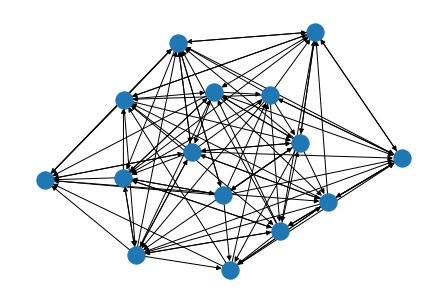

In [15]:
nx.draw(G)

In [5]:
G, g = get_strongly_connected_directed(20)
r = power_method(g)
np.sum(r)

1.0

In [6]:
G, g = get_strongly_connected_directed(25)
r = power_method(g)
np.sum(r)

0.9999999999999998

# Page Rank

In [7]:
def power_method_page_rank(M, d, e, max_iter=10000):
    eps = 10**(-10)
    n = M.shape[0]
    x1 = normalize(np.random.uniform(size=(n, 1)), norm='l1', axis=0)
    M = d*M + (1-d)*(e * np.identity(n))
    e = e.reshape((n, 1))
    for i in range(max_iter):
        x2 = M@x1
        d = np.linalg.norm(x1, 1) - np.linalg.norm(x2, 1)
        x2 += d*e
        if np.linalg.norm(x2-x1, 1) < eps:
            x1 = x2
            break
        x1 = x2
        
    return x1, i

In [8]:
n = 15
D = [0.9, 0.85, 0.75, 0.6, 0.5]
E = [normalize(np.ones((n, 1)), norm='l1', axis=0), normalize(np.random.uniform(size=(n, 1)), norm='l1', axis=0)]
for e in E:
    for d in D:
        G, g = get_strongly_connected_directed(n)
        r, i = power_method_page_rank(g, d, e)
        print(f'd = {d}, iterations = {i}, sum of ranks = {np.sum(r)}')

d = 0.9, iterations = 16, sum of ranks = 0.9999999999999992
d = 0.85, iterations = 17, sum of ranks = 1.0
d = 0.75, iterations = 15, sum of ranks = 1.0000000000000007
d = 0.6, iterations = 12, sum of ranks = 1.0000000000000002
d = 0.5, iterations = 11, sum of ranks = 0.9999999999999998
d = 0.9, iterations = 15, sum of ranks = 1.0000000000000004
d = 0.85, iterations = 15, sum of ranks = 1.0
d = 0.75, iterations = 14, sum of ranks = 0.9999999999999992
d = 0.6, iterations = 11, sum of ranks = 0.9999999999999986
d = 0.5, iterations = 11, sum of ranks = 0.9999999999999989


In [9]:
G  = nx.read_edgelist("p2p-Gnutella08.txt", create_using = nx.DiGraph)
g = normalize(nx.to_numpy_array(G), norm='l1',axis=0)

In [10]:
n = g.shape[0]
D = [0.75, 0.6, 0.5]
E = [normalize(np.ones((n, 1)), norm='l1', axis=0), normalize(np.random.uniform(size=(n, 1)), norm='l1', axis=0)]
for e in E:
    for d in D:
        r, i = power_method_page_rank(g, d, e)
        print(f'd = {d}, iterations = {i}, sum of ranks = {np.sum(r)}')

d = 0.75, iterations = 38, sum of ranks = 0.9999999999999996
d = 0.6, iterations = 27, sum of ranks = 0.9999999999999991
d = 0.5, iterations = 22, sum of ranks = 0.9999999999999987
d = 0.75, iterations = 37, sum of ranks = 1.0000000000000004
d = 0.6, iterations = 27, sum of ranks = 1.0000000000000004
d = 0.5, iterations = 22, sum of ranks = 1.0000000000000004
